In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sort.csv')
print(df)

program     size  entropy  time (ns)
0      java       10      0.0    3493100
1      java       10      0.0       9200
2      java       10      0.0       9100
3      java       10      0.0      10000
4      java       10      0.0      24801
5      java       10      0.1      14399
6      java       10      0.1      13900
7      java       10      0.1      41799
8      java       10      0.1      65800
9      java       10      0.1      14400
10     java       10      0.2       9600
11     java       10      0.2      25500
12     java       10      0.2       9300
13     java       10      0.2       8200
14     java       10      0.2      13000
15     java       10      0.5      70401
16     java       10      0.5      33300
17     java       10      0.5      12700
18     java       10      0.5      13400
19     java       10      0.5      12800
20     java       10      1.0     375601
21     java       10      1.0      10900
22     java       10      1.0      18100
23     java       10

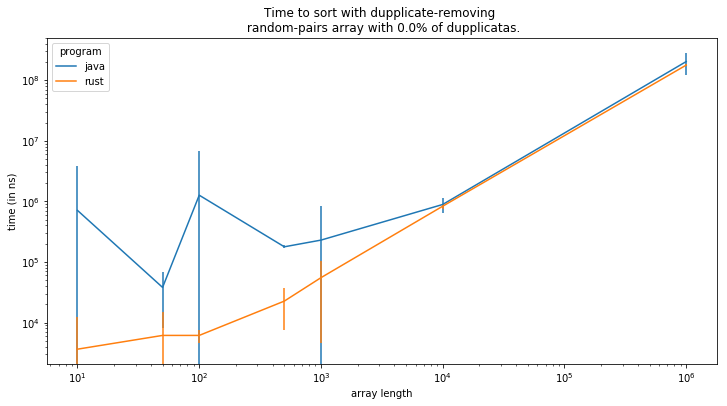

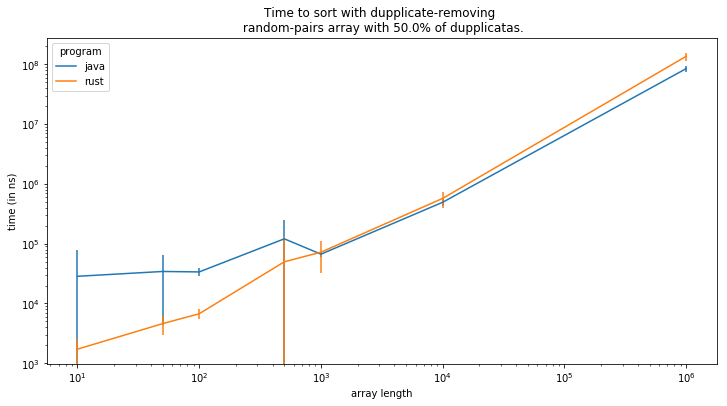

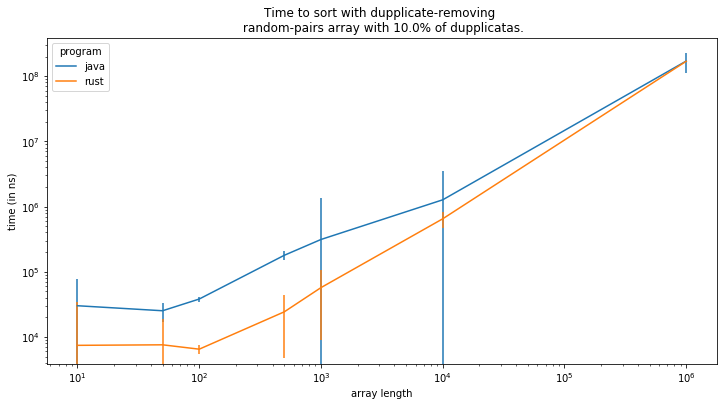

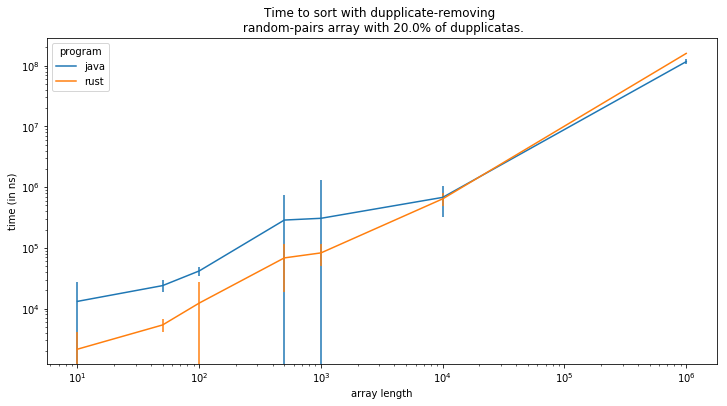

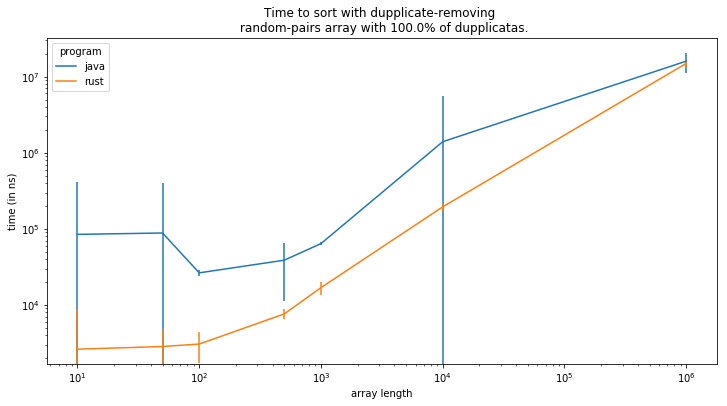

In [3]:

entropies = list(set(df['entropy']))
for entropy in entropies:
    data = df[df['entropy']==entropy].groupby(['program','size'])
    means = data['time (ns)'].mean().unstack().transpose()
    stdev = data['time (ns)'].std().unstack().transpose()
    ax = means.plot(yerr=2*stdev,title='Time to sort with dupplicate-removing \n random-pairs array with {}% of dupplicatas.'.format(entropy*100),loglog=True,figsize=(12,6))
    ax.set_ylabel('time (in ns)')
    ax.set_xlabel('array length')
    ax.get_figure().savefig("sort_{}.png".format(entropy))
    ax